In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('dataregression.csv')
print(len(dataset))

19


In [3]:
dataset.columns

Index(['feature1', 'feature2', 'value'], dtype='object')

In [4]:
features = ['feature1', 'feature2']

In [5]:
dataset

,feature1,feature2,value
0,2.0,0.1,7.00
1,2.5,0.2,7.20
2,3.0,0.3,7.20
3,3.5,0.4,7.30
4,4.0,0.5,7.50
5,4.5,0.6,7.60
6,5.0,0.7,7.65
7,5.5,0.8,7.55
8,6.0,0.9,7.60
9,6.5,1.0,7.70


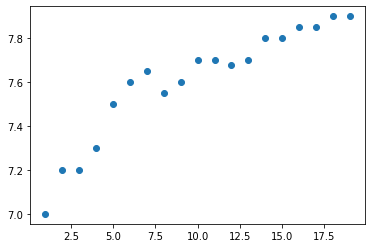

In [6]:
import matplotlib.pyplot as plt
plt.scatter(range(1, len(dataset)+1), dataset['value'])

In [7]:
# initial guess

np.random.seed(0)

theta0 = 0
theta1 = 0
#theta2 = 0

In [8]:
def evaluate(theta0, theta1):
    error = 0
    for i in range(len(dataset)):
        output = dataset.loc[i]['value']
        #predicted = theta0 + theta1*dataset.loc[i]['feature1'] + theta2*dataset.loc[i]['feature2']
        predicted = theta0 + theta1*dataset.loc[i]['feature1']
        error += (output - predicted)**2

    error /= 2*len(dataset)
    return error

In [9]:
alpha = 0.03
num_iterations = 3000
n = len(dataset)
val0 = theta0
val1 = theta1
for i in range(num_iterations):
    for j in range(n):
        output = dataset.loc[j]['value']
        #predicted = theta0 + theta1*dataset.loc[j]['feature1'] + theta2*dataset.loc[j]['feature2']
        predicted = theta0 + theta1*dataset.loc[j]['feature1']
        val0 = val0 - alpha*(predicted-output)
        val1 = val1 - alpha*(predicted-output)*dataset.loc[j]['feature1']
        #theta2 -= alpha*(output - predicted)*dataset.loc[j]['feature2']
    theta0 = val0/n
    theta1 = val1/n
    #theta2 /= n

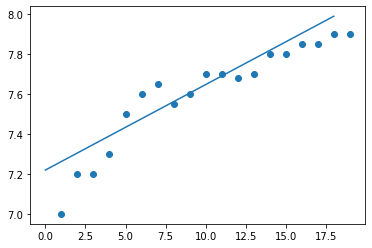

In [10]:
predicted_values = [theta0 + theta1*dataset.loc[j]['feature1'] for j in range(len(dataset))]
plt.scatter(range(1, len(dataset)+1), dataset['value'])
plt.plot(predicted_values)